In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd

DATA_PATH = 'dataset'

def load_csv(path = DATA_PATH):
    csv_path = os.path.join(path, 'drugsComTrain_raw.tsv')
    return pd.read_csv(csv_path,delimiter='\t',encoding='utf-8')

In [2]:
df = load_csv()

In [3]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['condition'] = encode.fit_transform(df['condition'].astype(str))
df['review'] = encode.fit_transform(df['review'].astype(str))
df['date'] = encode.fit_transform(df['date'].astype(str))

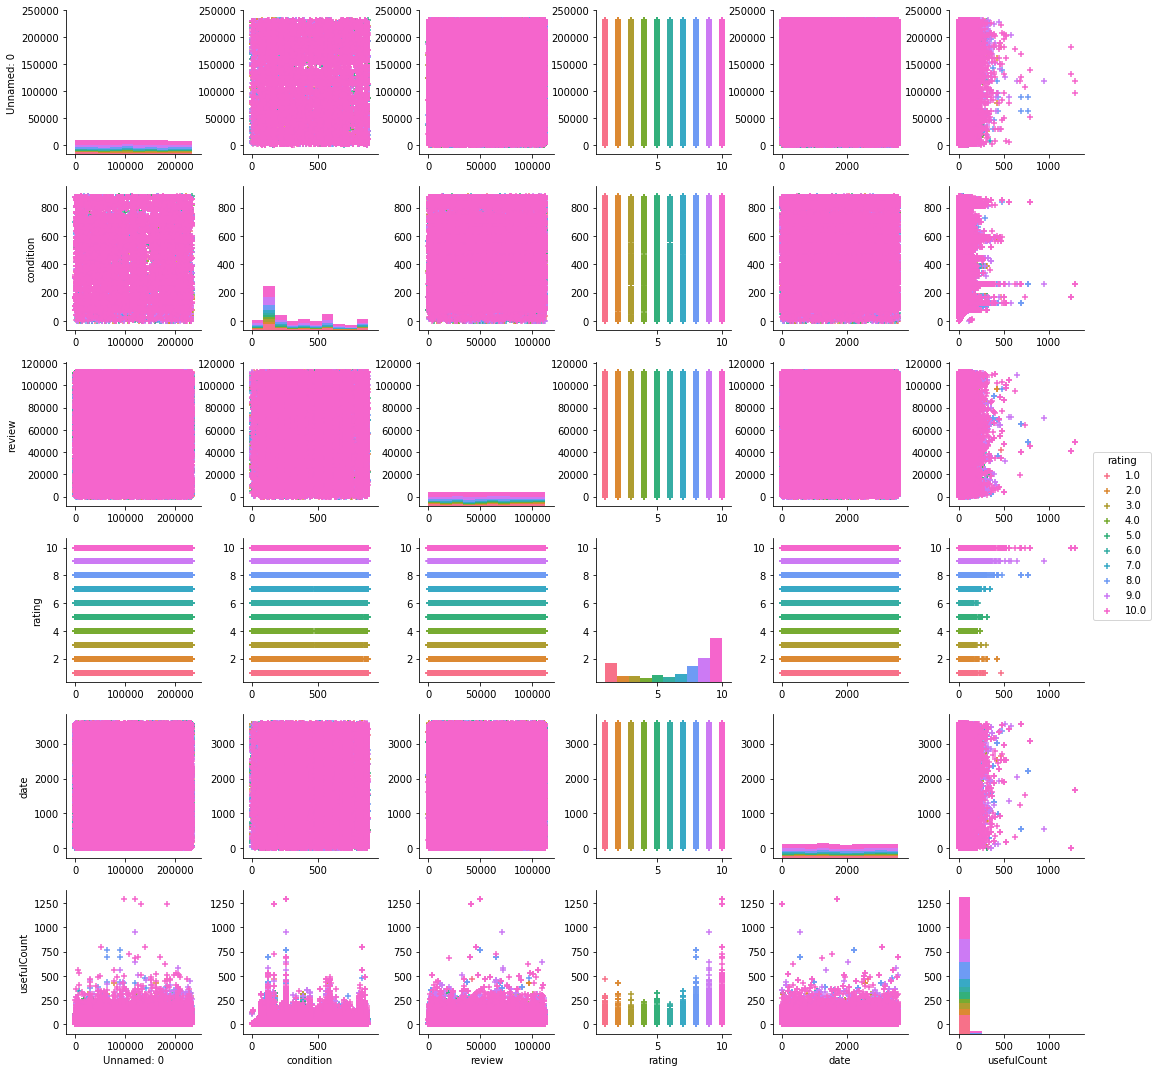

In [6]:
tmp = df.drop('drugName', axis=1)
g = sns.pairplot(tmp, hue='rating', markers='+')
plt.show()

In [7]:
########## Modeling with scikit-learn ####
X = df.drop(['rating', 'drugName'], axis=1)
y = df['drugName']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

   Unnamed: 0  condition  review  date  usefulCount
0      206461        466   77850  2483           27
1       95260         73   86240   192          192
2       92703        165   57839   660           17
3      138000        165   99172  2896           10
4       35696        574   94329  2867           37
(161297, 5)
0                   Valsartan
1                  Guanfacine
2                      Lybrel
3                  Ortho Evra
4    Buprenorphine / naloxone
Name: drugName, dtype: object
(161297,)


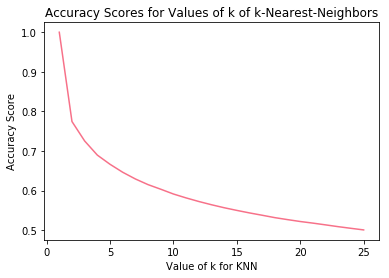

In [8]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2,3]])

array(['Silodosin'], dtype=object)